In [45]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [46]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()

In [47]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [48]:
# build the vocabulary of characters and mappings to/from integers

chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [49]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?

X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [50]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [51]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [52]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [53]:
C = torch.randn([27, 2])
C

tensor([[ 6.8954e-01, -9.8053e-01],
        [ 2.9408e-01,  9.5371e-01],
        [ 1.4181e+00,  4.3739e-01],
        [-1.4370e+00, -1.0548e-01],
        [ 9.9220e-01,  2.7281e-03],
        [ 1.8657e-01,  4.0185e-01],
        [-4.3670e-01,  1.6357e+00],
        [ 3.6456e-01,  4.7170e-03],
        [ 1.8312e+00, -1.2878e+00],
        [ 2.3202e-01,  5.4417e-02],
        [ 1.3432e-01,  7.2780e-01],
        [ 9.3198e-02, -1.6879e+00],
        [ 8.6844e-01,  3.1349e+00],
        [-9.3173e-01, -1.1472e-01],
        [-1.2245e+00,  8.9390e-01],
        [ 3.0843e-01,  6.5320e-01],
        [ 3.6563e-01, -8.1237e-02],
        [-1.4416e+00,  1.6650e+00],
        [ 1.3933e+00,  2.9454e-01],
        [-2.7436e-01,  3.4096e-01],
        [-2.3063e+00,  9.4083e-01],
        [ 7.0901e-01, -1.0040e+00],
        [ 2.5192e+00,  6.4064e-02],
        [ 1.0677e+00, -1.7034e+00],
        [ 7.8136e-01, -5.7484e-01],
        [-4.7180e-01,  1.8586e+00],
        [ 2.8870e-01, -1.4316e-01]])

In [54]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.1866, 0.4018])

In [55]:
C[5]

tensor([0.1866, 0.4018])

In [56]:
C[[5, 6, 7]]

tensor([[ 0.1866,  0.4018],
        [-0.4367,  1.6357],
        [ 0.3646,  0.0047]])

In [57]:
C[torch.tensor([5, 6, 7, 7])]

tensor([[ 0.1866,  0.4018],
        [-0.4367,  1.6357],
        [ 0.3646,  0.0047],
        [ 0.3646,  0.0047]])

In [58]:
C[X]

tensor([[[ 0.6895, -0.9805],
         [ 0.6895, -0.9805],
         [ 0.6895, -0.9805]],

        [[ 0.6895, -0.9805],
         [ 0.6895, -0.9805],
         [ 0.1866,  0.4018]],

        [[ 0.6895, -0.9805],
         [ 0.1866,  0.4018],
         [-0.9317, -0.1147]],

        [[ 0.1866,  0.4018],
         [-0.9317, -0.1147],
         [-0.9317, -0.1147]],

        [[-0.9317, -0.1147],
         [-0.9317, -0.1147],
         [ 0.2941,  0.9537]],

        [[ 0.6895, -0.9805],
         [ 0.6895, -0.9805],
         [ 0.6895, -0.9805]],

        [[ 0.6895, -0.9805],
         [ 0.6895, -0.9805],
         [ 0.3084,  0.6532]],

        [[ 0.6895, -0.9805],
         [ 0.3084,  0.6532],
         [ 0.8684,  3.1349]],

        [[ 0.3084,  0.6532],
         [ 0.8684,  3.1349],
         [ 0.2320,  0.0544]],

        [[ 0.8684,  3.1349],
         [ 0.2320,  0.0544],
         [ 2.5192,  0.0641]],

        [[ 0.2320,  0.0544],
         [ 2.5192,  0.0641],
         [ 0.2320,  0.0544]],

        [[ 2.5192,  0

In [59]:
C[X].shape

torch.Size([32, 3, 2])

In [60]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [61]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1)

tensor([[ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.1866,  0.4018],
        [ 0.6895, -0.9805,  0.1866,  0.4018, -0.9317, -0.1147],
        [ 0.1866,  0.4018, -0.9317, -0.1147, -0.9317, -0.1147],
        [-0.9317, -0.1147, -0.9317, -0.1147,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.3084,  0.6532],
        [ 0.6895, -0.9805,  0.3084,  0.6532,  0.8684,  3.1349],
        [ 0.3084,  0.6532,  0.8684,  3.1349,  0.2320,  0.0544],
        [ 0.8684,  3.1349,  0.2320,  0.0544,  2.5192,  0.0641],
        [ 0.2320,  0.0544,  2.5192,  0.0641,  0.2320,  0.0544],
        [ 2.5192,  0.0641,  0.2320,  0.0544,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.2941,  0.9537,  2.5192,  0.0641],
        [ 0.2941,  0.9537,  2.5192,  0.0

In [62]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.1866,  0.4018],
        [ 0.6895, -0.9805,  0.1866,  0.4018, -0.9317, -0.1147],
        [ 0.1866,  0.4018, -0.9317, -0.1147, -0.9317, -0.1147],
        [-0.9317, -0.1147, -0.9317, -0.1147,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.3084,  0.6532],
        [ 0.6895, -0.9805,  0.3084,  0.6532,  0.8684,  3.1349],
        [ 0.3084,  0.6532,  0.8684,  3.1349,  0.2320,  0.0544],
        [ 0.8684,  3.1349,  0.2320,  0.0544,  2.5192,  0.0641],
        [ 0.2320,  0.0544,  2.5192,  0.0641,  0.2320,  0.0544],
        [ 2.5192,  0.0641,  0.2320,  0.0544,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.2941,  0.9537,  2.5192,  0.0641],
        [ 0.2941,  0.9537,  2.5192,  0.0

In [63]:
emb.view(32, 6)

tensor([[ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.1866,  0.4018],
        [ 0.6895, -0.9805,  0.1866,  0.4018, -0.9317, -0.1147],
        [ 0.1866,  0.4018, -0.9317, -0.1147, -0.9317, -0.1147],
        [-0.9317, -0.1147, -0.9317, -0.1147,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.3084,  0.6532],
        [ 0.6895, -0.9805,  0.3084,  0.6532,  0.8684,  3.1349],
        [ 0.3084,  0.6532,  0.8684,  3.1349,  0.2320,  0.0544],
        [ 0.8684,  3.1349,  0.2320,  0.0544,  2.5192,  0.0641],
        [ 0.2320,  0.0544,  2.5192,  0.0641,  0.2320,  0.0544],
        [ 2.5192,  0.0641,  0.2320,  0.0544,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.6895, -0.9805],
        [ 0.6895, -0.9805,  0.6895, -0.9805,  0.2941,  0.9537],
        [ 0.6895, -0.9805,  0.2941,  0.9537,  2.5192,  0.0641],
        [ 0.2941,  0.9537,  2.5192,  0.0

In [64]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [65]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [66]:
h

tensor([[-0.8088, -0.9700, -0.9932,  ...,  0.9055,  0.9987,  0.9997],
        [-0.9738, -0.9658, -0.9661,  ...,  0.9001,  0.2322,  0.8446],
        [-0.7110, -0.9947, -0.9991,  ..., -0.9821, -0.6574,  0.9438],
        ...,
        [ 0.6833, -0.4290, -0.7133,  ...,  0.7727,  1.0000,  0.9974],
        [-0.1378, -0.1035, -0.0741,  ...,  0.9968,  0.9914,  0.9583],
        [-0.9998, -0.9922, -0.9967,  ..., -0.2688, -0.8784,  0.8127]])

In [67]:
h.shape

torch.Size([32, 100])

In [68]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [69]:
logits = h @ W2 + b2

In [70]:
logits.shape

torch.Size([32, 27])

In [71]:
counts = logits.exp()

In [72]:
probs = counts / counts.sum(1, keepdim=True)

In [73]:
probs.shape

torch.Size([32, 27])

In [74]:
probs[0].sum()

tensor(1.)

In [75]:
-probs[torch.arange(32), Y].log().mean()

tensor(16.1477)

In [76]:
# --- now made respectable :) ---

In [77]:
# build the dataset

def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?

    X, Y = [], []
    for w in words:
        print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

yuheng
... ---> y
..y ---> u
.yu ---> h
yuh ---> e
uhe ---> n
hen ---> g
eng ---> .
diondre
... ---> d
..d ---> i
.di ---> o
dio ---> n
ion ---> d
ond ---> r
ndr ---> e
dre ---> .
xavien
... ---> x
..x ---> a
.xa ---> v
xav ---> i
avi ---> e
vie ---> n
ien ---> .
jori
... ---> j
..j ---> o
.jo ---> r
jor ---> i
ori ---> .
juanluis
... ---> j
..j ---> u
.ju ---> a
jua ---> n
uan ---> l
anl ---> u
nlu ---> i
lui ---> s
uis ---> .
erandi
... ---> e
..e ---> r
.er ---> a
era ---> n
ran ---> d
and ---> i
ndi ---> .
phia
... ---> p
..p ---> h
.ph ---> i
phi ---> a
hia ---> .
samatha
... ---> s
..s ---> a
.sa ---> m
sam ---> a
ama ---> t
mat ---> h
ath ---> a
tha ---> .
phoenix
... ---> p
..p ---> h
.ph ---> o
pho ---> e
hoe ---> n
oen ---> i
eni ---> x
nix ---> .
emmelynn
... ---> e
..e ---> m
.em ---> m
emm ---> e
mme ---> l
mel ---> y
ely ---> n
lyn ---> n
ynn ---> .
hollan
... ---> h
..h ---> o
.ho ---> l
hol ---> l
oll ---> a
lla ---> n
lan ---> .
hollis
... ---> h
..h ---> o
.ho ---> l


---> e
.de ---> y
dey ---> t
eyt ---> o
yto ---> n
ton ---> .
emi
... ---> e
..e ---> m
.em ---> i
emi ---> .
filipe
... ---> f
..f ---> i
.fi ---> l
fil ---> i
ili ---> p
lip ---> e
ipe ---> .
calahan
... ---> c
..c ---> a
.ca ---> l
cal ---> a
ala ---> h
lah ---> a
aha ---> n
han ---> .
nalij
... ---> n
..n ---> a
.na ---> l
nal ---> i
ali ---> j
lij ---> .
lauralyn
... ---> l
..l ---> a
.la ---> u
lau ---> r
aur ---> a
ura ---> l
ral ---> y
aly ---> n
lyn ---> .
kyren
... ---> k
..k ---> y
.ky ---> r
kyr ---> e
yre ---> n
ren ---> .
meliodas
... ---> m
..m ---> e
.me ---> l
mel ---> i
eli ---> o
lio ---> d
iod ---> a
oda ---> s
das ---> .
damaree
... ---> d
..d ---> a
.da ---> m
dam ---> a
ama ---> r
mar ---> e
are ---> e
ree ---> .
rayquan
... ---> r
..r ---> a
.ra ---> y
ray ---> q
ayq ---> u
yqu ---> a
qua ---> n
uan ---> .
annastasia
... ---> a
..a ---> n
.an ---> n
ann ---> a
nna ---> s
nas ---> t
ast ---> a
sta ---> s
tas ---> i
asi ---> a
sia ---> .
tej
... ---> t
..t ---> e


In [78]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [79]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn(27, 10, generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [80]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [81]:
for p in parameters:
    p.requires_grad = True

In [105]:
lossi = []
stepi = []

for i in range(100000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdim=True)
    # loss = -probs[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update 
    lr = 0.001
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())

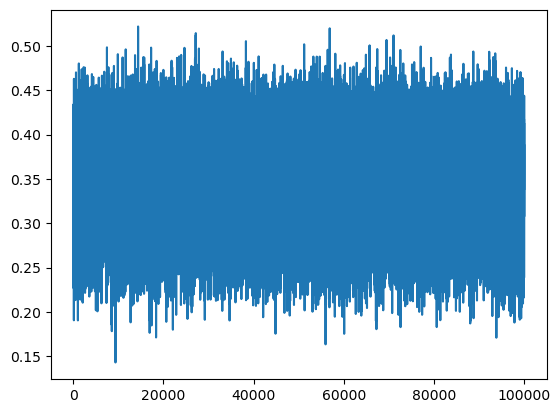

In [106]:
plt.plot(stepi, lossi)

In [107]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
# loss = -probs[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Ytr)
print(loss.item())


2.2340731620788574


In [108]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
# loss = -probs[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.2465155124664307


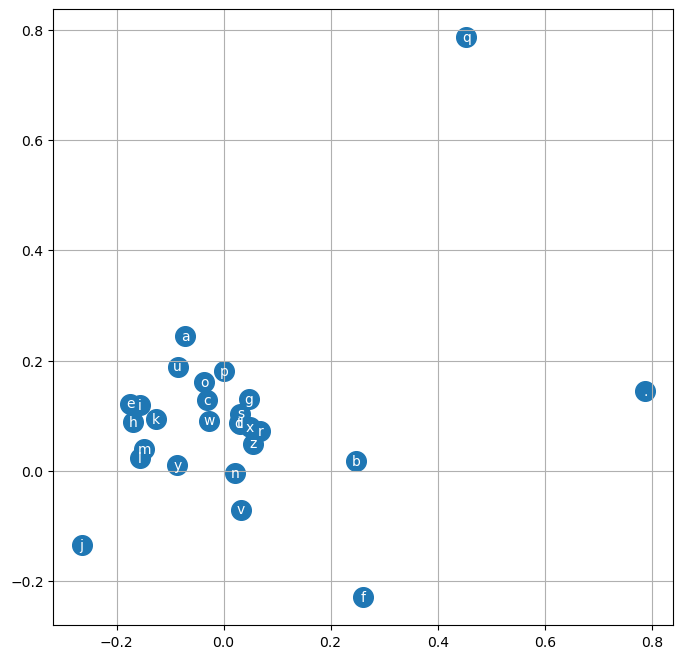

In [109]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [113]:
# g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    formed = ""
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        if ix == 0:
            break
        formed += itos[ix]
    print(formed)


halete
thancearrri
mazethae
foreston
arga
calaeeannah
kone
caleanaffonyron
jayleyann
ryrma
rosanya
recoleodifer
nuzahi
bralin
zavanguryel
syiea
jack
rulla
kalodinn
ziyanna
